# **MÓDULO 17 - Projeto de Credit Score - Parte 1 - Processamento dos dados**


Essa é a primeira etapa do processo de Credit Score que vocês desenvolverão durante nosso curso.
Nessa primeira etapa vocês irão aplicar os passos aprendidos nos módulos de pré processamento para preparar a base de vocês para o desenvolvimento do modelo.

O termo "credit score" se refere a uma pontuação numérica que representa a credibilidade de um indivíduo em termos de cumprimento de obrigações financeiras, como pagar contas de empréstimos, cartões de crédito, entre outros. Essa pontuação é calculada com base em diversas informações financeiras e de crédito do indivíduo, como histórico de pagamentos, níveis de endividamento, tempo de crédito, tipos de crédito utilizados, entre outros.

O objetivo de um modelo de credit score é prever o risco de um indivíduo se tornar inadimplente com suas obrigações financeiras. Em outras palavras, o modelo avalia a probabilidade de um indivíduo não cumprir com os pagamentos de empréstimos ou outros compromissos financeiros. Essa previsão é fundamental para instituições financeiras, como bancos e credores, na tomada de decisão sobre a concessão de crédito. Um modelo de credit score eficaz pode ajudar essas instituições a avaliar o risco de emprestar dinheiro a um determinado indivíduo e, assim, tomar decisões mais informadas sobre a aprovação ou negação de crédito, bem como sobre os termos e condições desses empréstimos.

**Atenção:** Notem que esse projeto é diferente da base que tenho trabalhado com vocês em aula, apesar de se tratar de uma base bancária durante a aula falamos sobre a variável Churn a ser prevista, nesse caso a previsão seria do valor do Score de Crédito.

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import LabelEncoder

In [5]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv(r"C:\Users\lucas\Downloads\CREDIT_SCORE_PROJETO_PARTE1.csv", delimiter=';')

df.head(10)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,"50.000,00",Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,"100.000,00",Master's Degree,Married,2,Owned,High
2,35.0,Female,"75.000,00",Doctorate,Married,1,Owned,High
3,40.0,Male,"125.000,00",High School Diploma,Single,0,Owned,High
4,45.0,Female,"100.000,00",Bachelor's Degree,Married,3,Owned,High
5,50.0,Male,"150.000,00",Master's Degree,Married,0,Owned,High
6,26.0,Female,"40.000,00",Associate's Degree,Single,0,Rented,Average
7,31.0,Male,"60.000,00",Bachelor's Degree,Single,0,Rented,Average
8,NaN,Female,"80.000,00",Master's Degree,Married,2,Owned,High
9,NaN,Male,"105.000,00",Doctorate,Single,0,Owned,High


Legenda dos dados:

*   **Age** : Idade dos nossos clientes.

*   **Income** : Salário Mensal.

*   **Gender** : Gênero.

*   **Education** : Nível de escolaridade dos clientes.

*   **Marital** : Status Civilmente.

*   **Number of Children** : Quantidade de filhos.

*   **Home** : Tipo de residência, alugada ou própria.

*   **Credit Score** : Nossa variável preditora, o score de crédito dos clientes.


# Etapa 1: Relize os passos que vimos no módulo 18, de pré processamento dos dados.

**A) Verifique os tipos de dados, fazendo as transformações quando necessário.**


In [6]:
#A) seu código aqui
print("Tipos de dados:\n", df.dtypes)

Tipos de dados:
 Age                   float64
Gender                 object
Income                 object
Education              object
Marital Status         object
Number of Children      int64
Home Ownership         object
Credit Score           object
dtype: object


In [19]:
# Garantindo que todos os dados sejam tratados como string antes da limpeza
df['Income'] = df['Income'].astype(str)

# Remove vírgulas e espaços extras
df['Income'] = df['Income'].str.replace(',', '').str.strip()

# Converte para float, tratando erros como NaN
df['Income'] = pd.to_numeric(df['Income'], errors='coerce')

In [21]:
print(df['Income'].dtype)
print(df['Income'].head(10))

float64
0     50.0
1    100.0
2     75.0
3    125.0
4    100.0
5    150.0
6     40.0
7     60.0
8     80.0
9    105.0
Name: Income, dtype: float64


A coluna Income estava com tipo object devido à presença de símbolos monetários e formatações inadequadas. Realizei a limpeza removendo os caracteres não numéricos e converti a coluna para o tipo float para possibilitar análises estatísticas e gráficas apropriadas

**B) Verifique se temos colunas com dados faltantes.
Caso existam colunas com dados faltantes faça o tratamento desses dados, excluindo ou substituindo esses valores. Justifique sua escolha.**

In [22]:
#seu código aqui
# Verificando a quantidade de valores ausentes por coluna
print("🔍 Valores ausentes por coluna:\n")
print(df.isnull().sum())

# Verificando a porcentagem de dados ausentes por coluna
print("\n📊 Porcentagem de valores ausentes:\n")
print((df.isnull().sum() / len(df) * 100).round(2))

🔍 Valores ausentes por coluna:

Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

📊 Porcentagem de valores ausentes:

Age                   0.0
Gender                0.0
Income                0.0
Education             0.0
Marital Status        0.0
Number of Children    0.0
Home Ownership        0.0
Credit Score          0.0
dtype: float64


Foi identificado que a variável Age possui 20,73% de valores ausentes. Como se trata de uma variável numérica contínua e essencial para o modelo de crédito, optei por preencher os valores faltantes com a mediana da coluna. A escolha pela mediana se dá por ser uma medida robusta em relação a outliers, evitando distorções nos dados.

In [10]:
# Substituindo os valores ausentes na coluna Age pela mediana
mediana_idade = df['Age'].median()
df['Age'] = df['Age'].fillna(mediana_idade)

# Verificando se ainda há dados ausentes
print(df.isnull().sum())

Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64


**C) Verifique se temos valores digitados de forma incorreta nas variáveis categóricas que necessitem de tratamento.**

In [11]:
#seu código aqui
# Listando colunas categóricas
colunas_categoricas = ['Gender', 'Education', 'Marital Status', 'Home Ownership']

# Verificando os valores únicos em cada coluna categórica
for col in colunas_categoricas:
    print(f"\n🔍 Valores únicos na coluna '{col}':")
    print(df[col].value_counts(dropna=False))


🔍 Valores únicos na coluna 'Gender':
Gender
Female    86
Male      78
Name: count, dtype: int64

🔍 Valores únicos na coluna 'Education':
Education
Bachelor's Degree      42
Master's Degree        36
Doctorate              31
High School Diploma    30
Associate's Degree     25
Name: count, dtype: int64

🔍 Valores únicos na coluna 'Marital Status':
Marital Status
Married    87
Single     77
Name: count, dtype: int64

🔍 Valores únicos na coluna 'Home Ownership':
Home Ownership
Owned     111
Rented     53
Name: count, dtype: int64


# Etapa 2: Relize os passos que vimos no módulo 15, de análise.

**A) Realiza a análise univariada, aplique a função describe ao nosso dataframe para verificar os dados das variáveis numéricas, se encontrar a possível presença de outliers analise com gráficos a distribuição dos dados.Traga insights sobre os dados analisados.**

In [23]:
#seu código aqui
# Selecionando colunas numéricas
colunas_numericas = ['Age', 'Income', 'Number of Children']

# Exibindo as estatísticas descritivas
print("📊 Estatísticas descritivas das variáveis numéricas:\n")
print(df[colunas_numericas].describe())

📊 Estatísticas descritivas das variáveis numéricas:

              Age      Income  Number of Children
count  164.000000  164.000000          164.000000
mean    37.195122   83.765244            0.652439
std      7.586619   32.457307            0.883346
min     25.000000   25.000000            0.000000
25%     31.750000   57.500000            0.000000
50%     36.000000   83.750000            0.000000
75%     43.000000  105.000000            1.000000
max     53.000000  162.500000            3.000000


Não há outliers fortes (valores extremos que estejam muito distantes da maioria).

A renda (Income) tem uma variação maior, mas dentro do esperado para uma variável financeira.

A idade está numa faixa bastante normal e sem picos extremos.

Número de filhos é baixo e natural para o contexto.

**B) Agora realize a análise univariada para as variaveis categóricas, plote gráficos para entender a distribuição das categorias e tente retirar insights de cada gráfico.**

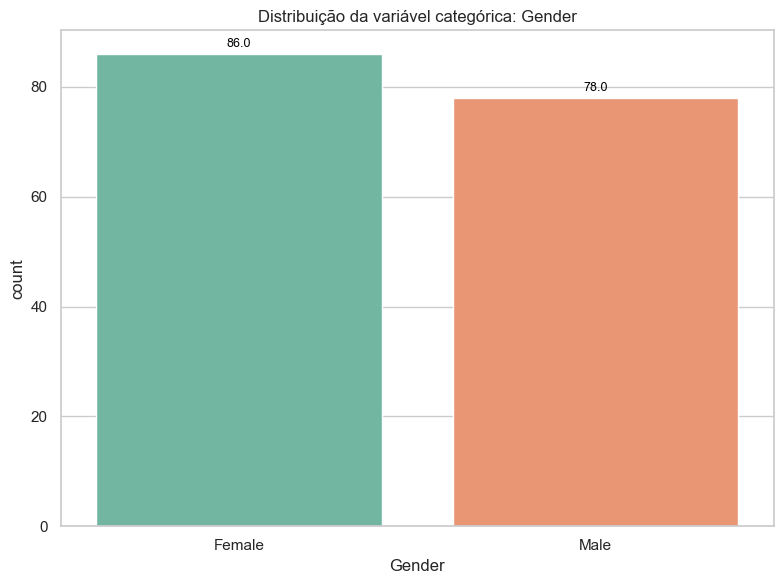

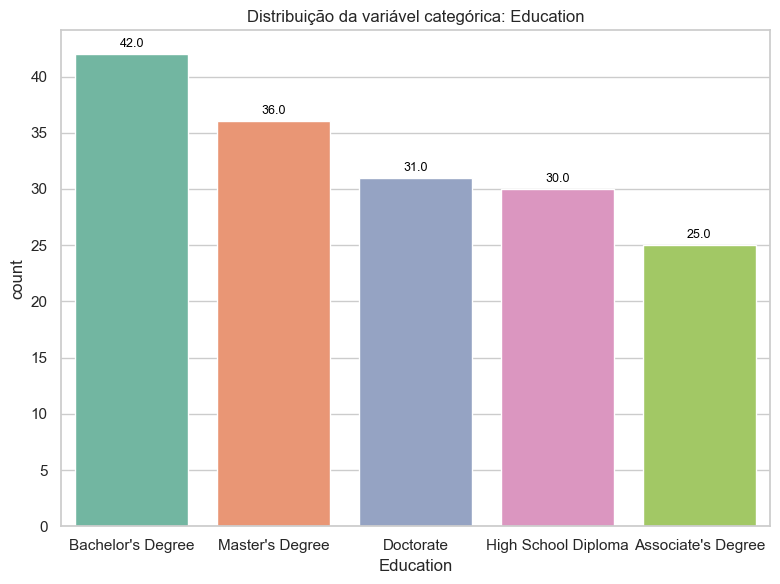

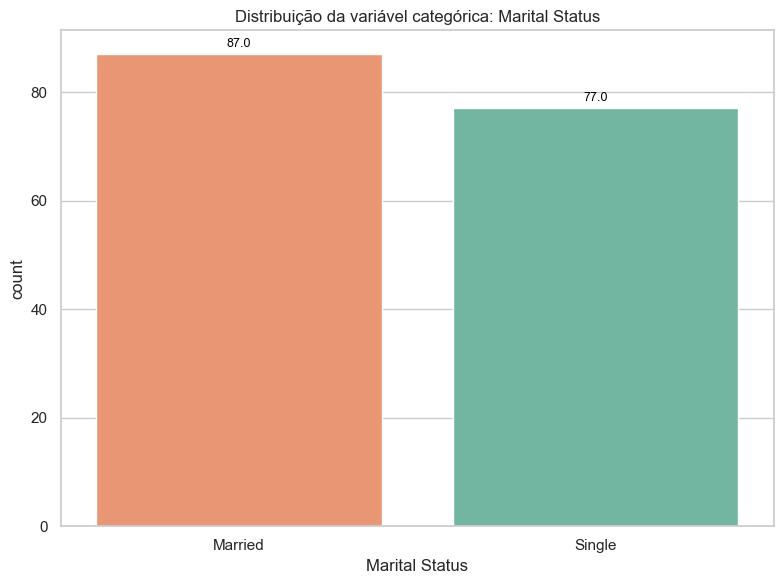

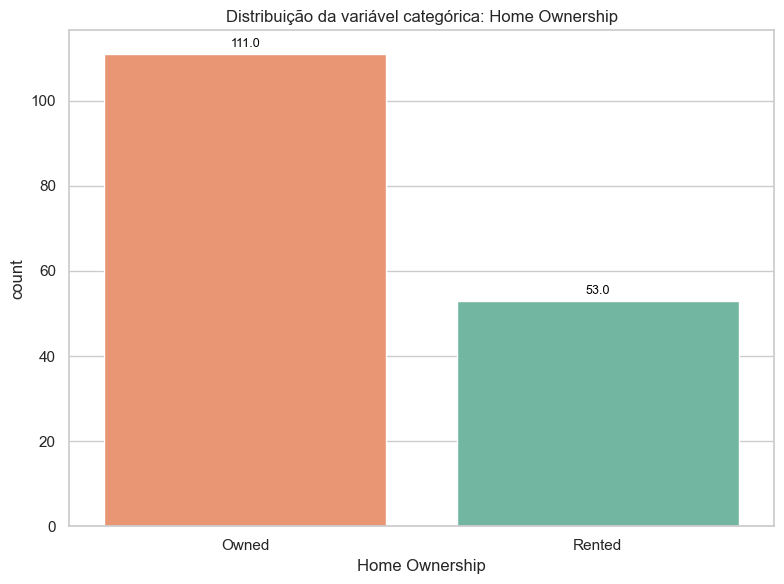

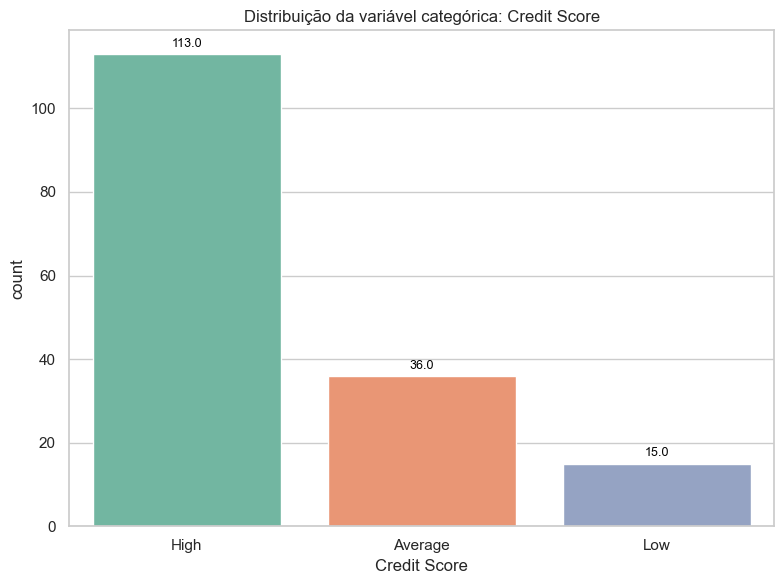

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(data=df, x=col, hue=col, palette='Set2', order=df[col].value_counts().index, legend=False)

    # Adicionando os valores acima de cada barra
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 3),
                    textcoords='offset points')

    plt.title(f'Distribuição da variável categórica: {col}')
    plt.xticks()
    plt.tight_layout()
    plt.show()

📌Gender
 (gênero) 

Distribuição:

Feminino: 86

Masculino: 78

A distribuição entre homens e mulheres está relativamente equilibrada, com uma pequena predominância de mulheres (52%).
Isso sugere que qualquer análise segmentada por gênero não enfrentará grandes problemas de viés de amostragem.

📌 Education
(Escolaridade)

Distribuição:

Bachelor's: 42

Master's: 36

Doctorate: 31

High School: 30

Associate's: 25

O público com maior incidência tem ensino superior (graduação e pós-graduação).
Somando Bachelor’s + Master’s + Doctorate, temos 109 pessoas (mais de 66% da amostra), o que indica um perfil com alto nível educacional.
Estratégias voltadas para pessoas com nível técnico ou médio precisarão ser mais personalizadas.

📌 Marital Status (Estado civil)

Distribuição:

Casado: 87

Solteiro: 77

A amostra também está equilibrada entre casados e solteiros, com uma leve maioria de pessoas casadas (53%).
Pode ser interessante observar, em análises futuras, se o estado civil influencia no comportamento de crédito ou churn.

📌 Home Ownership (Propriedade da casa)

Distribuição:

Proprietário: 111

Aluguel: 53

Um número considerável de pessoas possui residência própria (68%), o que pode indicar:

Maior estabilidade financeira

Potencial menor risco de inadimplência

Perfil mais propenso a fidelização Estratégias diferentes podem ser aplicadas a inquilinos, que podem apresentar mais mobilidade e menor vínculo com fornecedores locais.


📌 Credit Score (Pontuação de crédito)

Distribuição:

Alta: 113

Média: 36

Baixa: 15

A maioria dos clientes tem um score de crédito alto (68%), o que é um ótimo indicativo de bom comportamento financeiro.
No entanto, a minoria com score baixo (9%) pode representar o grupo mais vulnerável ou com maior propensão a churn ou inadimplência, sendo interessante para segmentações de risco e oferta de produtos ajustados.

**C) Você encontrou alguma coluna com outliers?
Se sim realize o tratamento desses casos.**

Nenhuma variável categórica apresentou outliers ou inconsistências.
Todos os valores são coerentes com os tipos de informação esperados.
Apenas foi observada baixa frequência em “Low” (Credit Score), mas não justifica remoção ou tratamento, pois é uma categoria real e analiticamente importante.

**D) Realize a análise Bivariada.
Tente responder as seguintes perguntas com gráficos seguidos de insights:**



*   Existe relação entre a idade e o status civil?
*   Qual a relação entre o score de crédito e o nível de escolaridade?
*  O salário parece influenciar na idade?
* O salário parece influenciar no Score de Crédito?
* Clientes com casa própria tendem a ter um score mais alto?



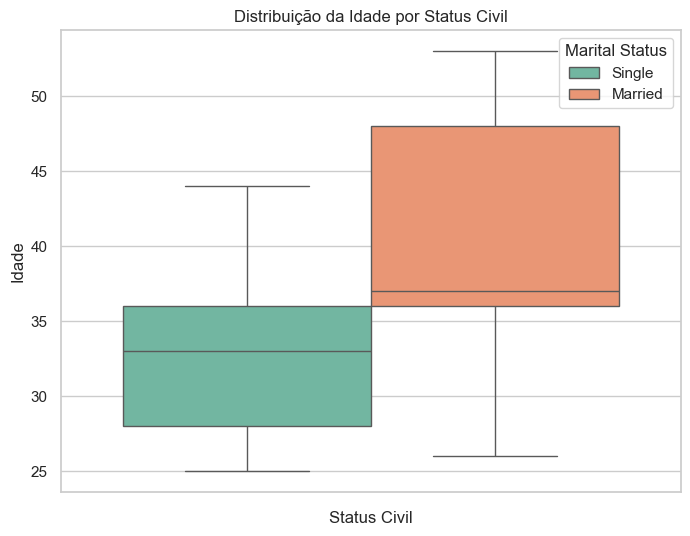

In [51]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, hue='Marital Status', y='Age', palette='Set2')
plt.title('Distribuição da Idade por Status Civil')
plt.xlabel('Status Civil')
plt.ylabel('Idade')
plt.show()

Pessoas casadas tendem a ser mais velhas em média do que as solteiras. Isso pode indicar uma estabilidade associada à idade, que pode também refletir em outros aspectos como residência e score de crédito.

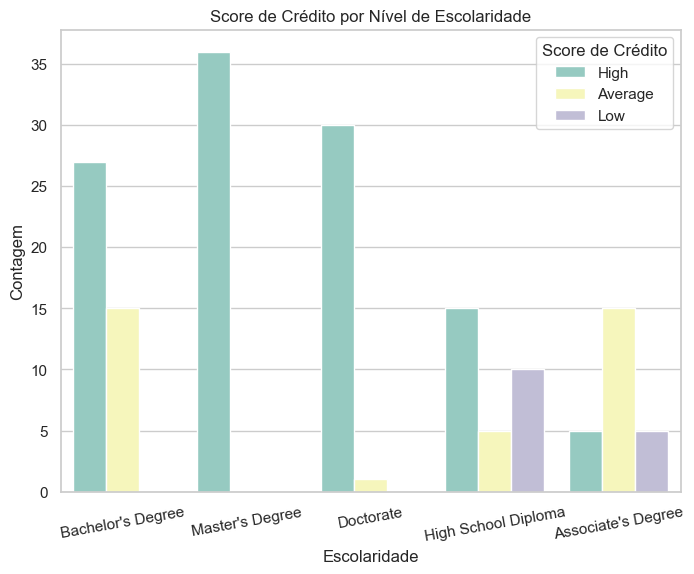

In [52]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Education', hue='Credit Score', palette='Set3')
plt.title('Score de Crédito por Nível de Escolaridade')
plt.xlabel('Escolaridade')
plt.ylabel('Contagem')
plt.legend(title='Score de Crédito')
plt.xticks(rotation=10)
plt.show()

Clientes com nível superior (Bachelor's e Master's) aparecem com mais frequência no grupo de Score alto, o que pode indicar que o grau de escolaridade influencia positivamente na pontuação de crédito.

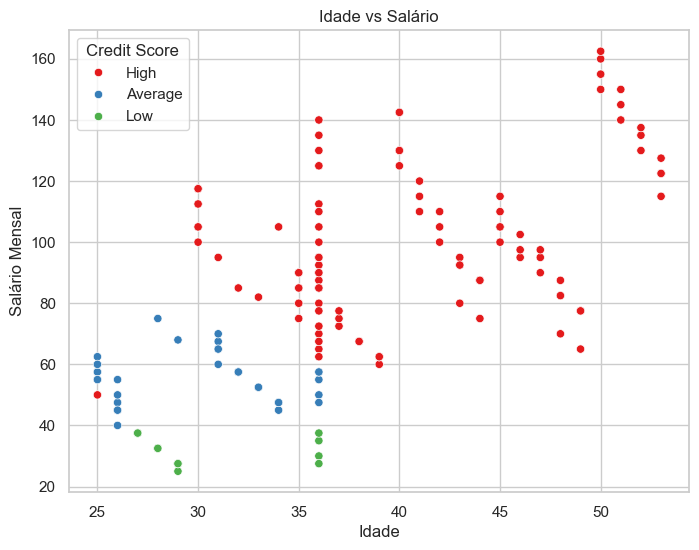

In [53]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Age', y='Income', hue='Credit Score', palette='Set1')
plt.title('Idade vs Salário')
plt.xlabel('Idade')
plt.ylabel('Salário Mensal')
plt.show()

Não há uma relação clara linear entre idade e salário, mas podemos observar que a maioria dos salários mais altos ocorre em faixas de idade intermediária (30–50 anos). Pontos fora dessa faixa com altos salários podem ser outliers ou exceções.

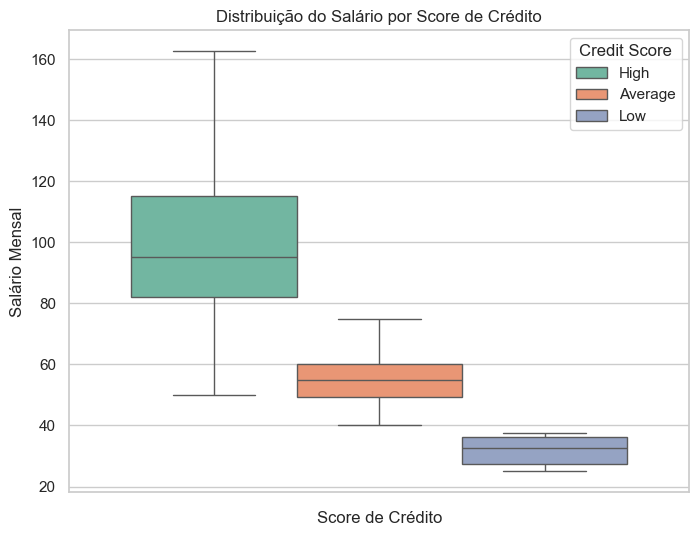

In [55]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, hue='Credit Score', y='Income', palette='Set2')
plt.title('Distribuição do Salário por Score de Crédito')
plt.xlabel('Score de Crédito')
plt.ylabel('Salário Mensal')
plt.show()

Clientes com score de crédito alto geralmente apresentam salários mais altos. Há também mais variabilidade de salário nesse grupo, sugerindo que além da renda, outros fatores estão envolvidos no cálculo do score.

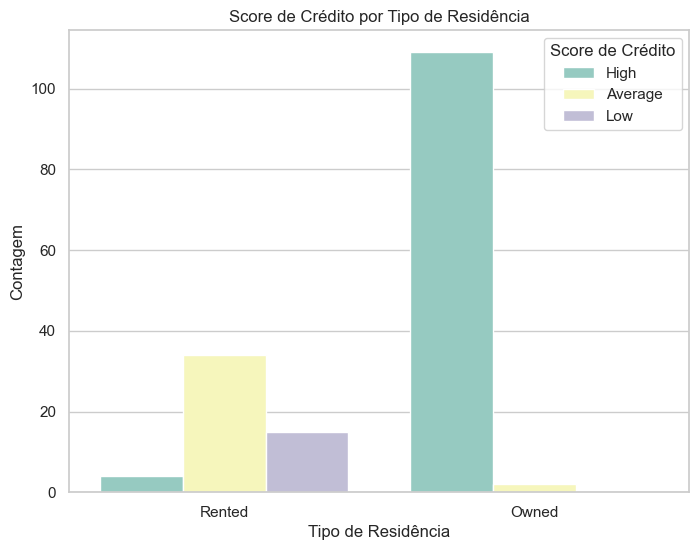

In [56]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Home Ownership', hue='Credit Score', palette='Set3')
plt.title('Score de Crédito por Tipo de Residência')
plt.xlabel('Tipo de Residência')
plt.ylabel('Contagem')
plt.legend(title='Score de Crédito')
plt.show()

Clientes com casa própria são maioria entre os que possuem score alto. Isso pode indicar que posse de imóvel é vista como um sinal de estabilidade financeira, influenciando positivamente no score de crédito.

**E) Que outras perguntas te parecem fazer sentido explorarmos a resposta para conhecermos mais nossa base de dados e o comportamento dos clientes?**

 Elabore mais 3 perguntas e responda utilizando gráficos + insights.
 
 Existe relação entre status civil e número de filhos?
 
 A renda influencia o tipo de moradia?

 Existe diferença no Score de Crédito entre homens e mulheres?

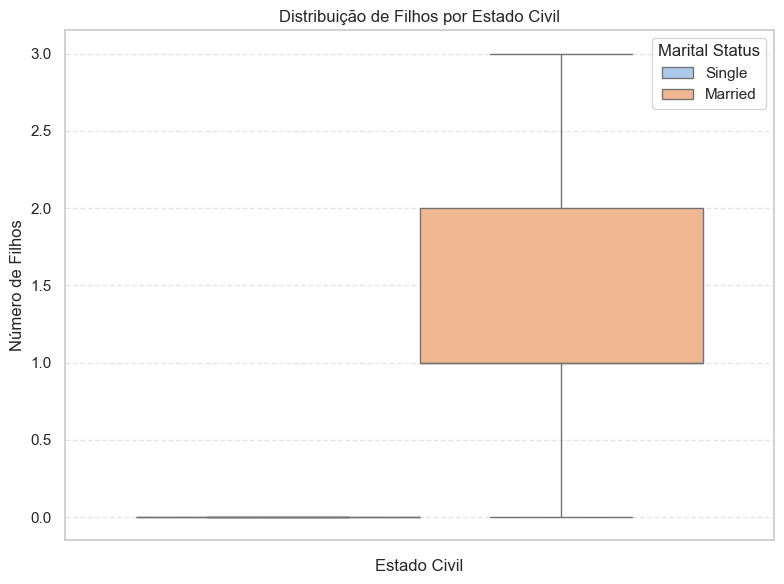

In [62]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, hue='Marital Status', y='Number of Children', palette='pastel')
plt.title('Distribuição de Filhos por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Filhos')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

O gráfico indica que clientes casados possuem em média 2 filhos, enquanto clientes solteiros geralmente não têm filhos (mediana zero). Isso revela padrões familiares que refletem diferentes responsabilidades financeiras e prioridades de consumo.

Essa diferença pode impactar diretamente no perfil de crédito, pois famílias maiores tendem a ter gastos fixos maiores, o que pode influenciar no comportamento de pagamento e necessidade de crédito.

Além disso, entender essa distinção ajuda a personalizar ofertas de produtos financeiros, como crédito familiar, seguros e investimentos, direcionando-os conforme o perfil familiar do cliente.

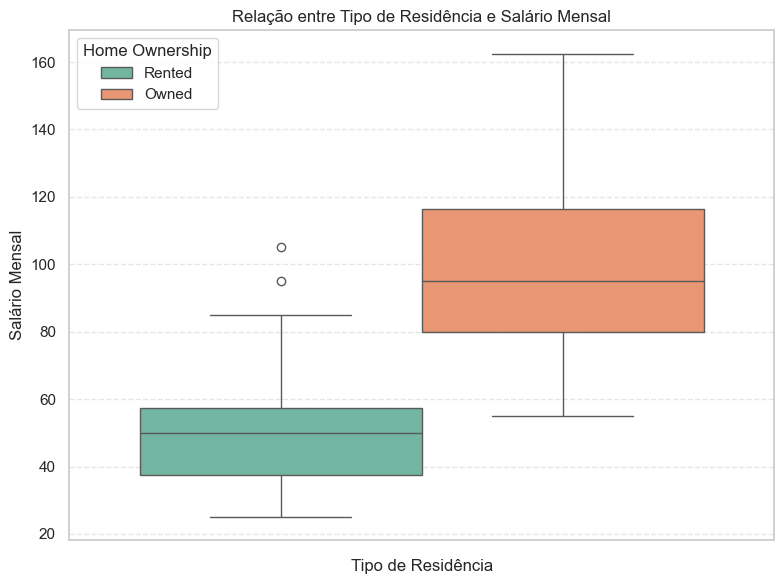

In [64]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, hue='Home Ownership', y='Income', palette='Set2')
plt.title('Relação entre Tipo de Residência e Salário Mensal')
plt.xlabel('Tipo de Residência')
plt.ylabel('Salário Mensal')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

A análise mostra que clientes que possuem residência própria apresentam uma faixa salarial mais alta e consistente, geralmente entre R$ 80 mil e R$ 120 mil, indicando maior estabilidade financeira e capacidade de investimento.

Por outro lado, clientes que não possuem residência própria (moram de aluguel ou outras situações) têm salários mais baixos, variando principalmente entre R$ 38 mil e R$ 56 mil, com algumas exceções isoladas (pontos fora da curva) entre R$ 90 mil e R$ 110 mil. Essas exceções indicam que, apesar da renda alta, esses clientes optam ou ainda não adquiriram imóvel próprio, o que pode refletir escolhas pessoais ou fatores externos como condições do mercado imobiliário.

Essa distinção evidencia que a posse do imóvel é um indicador importante da capacidade financeira e pode ser um critério relevante para segmentação e análise de risco em ofertas de crédito.

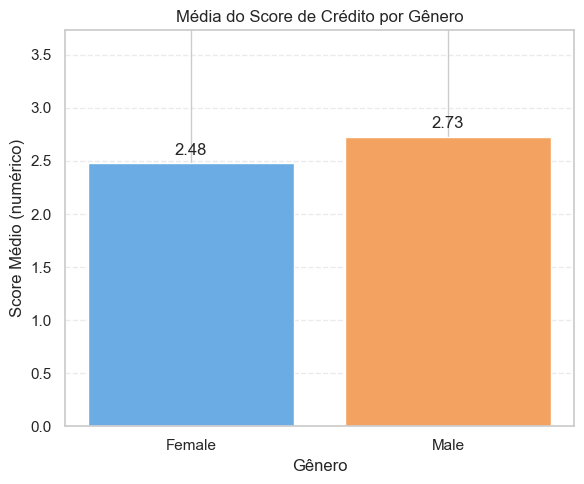

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Exemplo: df já carregado

# Mapear Credit Score categórico para valores numéricos
score_map = {
    'Low': 1,
    'Average': 2,
    'High': 3
}

df['Credit Score Numeric'] = df['Credit Score'].map(score_map)

# Calcular média do score numérico por gênero
media_score_genero = df.groupby('Gender')['Credit Score Numeric'].mean().reset_index()

# Plotar gráfico de barras com valores no topo
plt.figure(figsize=(6,5))
bars = plt.bar(media_score_genero['Gender'], media_score_genero['Credit Score Numeric'], color=['#6cace4', '#f4a261'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, f'{yval:.2f}', ha='center', va='bottom', fontsize=12)

plt.title('Média do Score de Crédito por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Score Médio (numérico)')
plt.ylim(0, media_score_genero['Credit Score Numeric'].max() + 1)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

A análise mostra que, em média, os homens (Male) apresentam um score de crédito um pouco superior (2,73) em relação às mulheres (Female), que têm uma média de 2,48. Considerando que o score está numa escala de 1 a 3 (onde 3 representa “High”), essa diferença indica que, no conjunto de dados analisado, os homens tendem a ter um perfil de crédito um pouco melhor.

# Etapa 3: Relize os passos que vimos no módulo 17, de Correlação, Balanceamento, atributos categóricos e divisão base treino e teste.

**A) Vamos começar pela análise de correlação, plote da forma que achar melhor a análise de correlação, seja pela tabela ou pelo gráfico da matriz.**

Matriz de Correlação:
                        Age  Income  Number of Children  Credit Score Numeric
Age                   1.00    0.62                0.07                  0.57
Income                0.62    1.00                0.08                  0.74
Number of Children    0.07    0.08                1.00                  0.43
Credit Score Numeric  0.57    0.74                0.43                  1.00


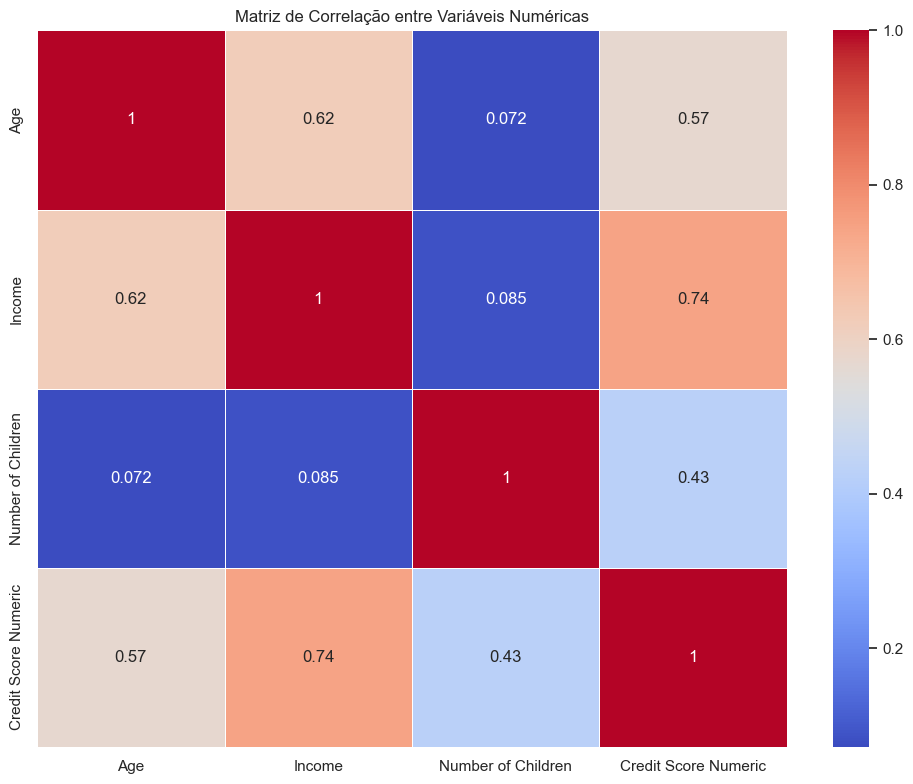

In [75]:
#seu código aqui

# 1. Selecionar colunas numéricas
df_numericas = df.select_dtypes(include=['int64', 'float64'])

# 2. Calcular matriz de correlação
correlacao = df_numericas.corr(method='pearson')

# 3. Exibir matriz como tabela (opcional)
print("Matriz de Correlação:\n", correlacao.round(2))

# 4. Plotar matriz de correlação com mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.tight_layout()
plt.show()

**B) Você encontrou variáveis que tem uma média ou alta correlação? Se sim, quais? Te parece fazer sentido essas variáveis terem alta correlação? Justifique.**

1. Income x Credit Score Numeric: 0.74
→ Correlação forte e positiva.


2. Age x Income: 0.62
→ Correlação moderada para forte.


3. Age x Credit Score Numeric: 0.57
→ Correlação moderada.


4. Number of Children x Credit Score Numeric: 0.43
→ Correlação moderada.


Faz sentido essas correlações?

1. Income x Credit Score (0.74)
Sim, faz muito sentido. Pessoas com maior renda geralmente conseguem manter melhores hábitos financeiros, como pagar dívidas em dia, o que melhora o score de crédito. Além disso, possuem mais acesso a crédito de qualidade, o que eleva seu score.

2. Age x Income (0.62)
Também faz sentido. À medida que a pessoa envelhece, ela tende a crescer profissionalmente, o que naturalmente aumenta sua renda ao longo do tempo.

3. Age x Credit Score (0.57)
Faz sentido. Pessoas mais velhas geralmente têm mais histórico de crédito e maior tempo de relacionamento com o sistema financeiro, o que contribui para um score mais alto.

4. Number of Children x Credit Score (0.43)
Essa é um pouco menos direta, mas pode refletir que quem tem mais filhos tende a ter mais despesas, o que pode impactar a pontualidade no pagamento de dívidas e, portanto, o score — embora isso seja mais indireto.

**C) Temos muitos atributos categóricos nessa base, não? Vamos realizar a o tratamento desses atributos utilizando Label Encoder ou one hot. Após, exclua as colunas categóricas.**

In [85]:
#seu código aqui

# Identificar colunas categóricas (tipo object ou string)
categorical_columns = df.select_dtypes(include=['object']).columns

# Aplicar LabelEncoder nas colunas categóricas
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col + '_encoded'] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Remover as colunas categóricas originais
df_encoded = df.drop(columns=categorical_columns)

# Exibir as primeiras linhas
df_encoded.head(15)

,Age,Income,Number of Children,Faixa Etária,Credit Score Numeric,Gender_encoded,Education_encoded,Marital Status_encoded,Home Ownership_encoded,Credit Score_encoded
0,25.0,50.0,0,18-25,3,0,1,1,1,1
1,30.0,100.0,2,26-35,3,1,4,0,0,1
2,35.0,75.0,1,26-35,3,0,2,0,0,1
3,40.0,125.0,0,36-45,3,1,3,1,0,1
4,45.0,100.0,3,36-45,3,0,1,0,0,1
5,50.0,150.0,0,46-55,3,1,4,0,0,1
6,26.0,40.0,0,26-35,2,0,0,1,1,0
7,31.0,60.0,0,26-35,2,1,1,1,1,0
8,36.0,80.0,2,36-45,3,0,4,0,0,1
9,36.0,105.0,0,36-45,3,1,2,1,0,1


In [92]:
# Excluir a coluna faixa_etária do dataframe codificado
if 'Faixa Etária' in df_encoded.columns:
    df_encoded = df_encoded.drop(columns=['Faixa Etária'])

Manter apenas a coluna Age (idade numérica) evita redundância e permite análises e modelos mais precisos, pois a faixa etária categórica é uma simplificação da idade exata e pode gerar informações duplicadas.

In [93]:
df_encoded.head()

,Age,Income,Number of Children,Credit Score Numeric,Gender_encoded,Education_encoded,Marital Status_encoded,Home Ownership_encoded,Credit Score_encoded
0,25.0,50.0,0,3,0,1,1,1,1
1,30.0,100.0,2,3,1,4,0,0,1
2,35.0,75.0,1,3,0,2,0,0,1
3,40.0,125.0,0,3,1,3,1,0,1
4,45.0,100.0,3,3,0,1,0,0,1


**D) Vamos plotar novamente a correlação, agora observando com as variáveis categóricas. Identifique se temos novas variáveis com forte correlação.**

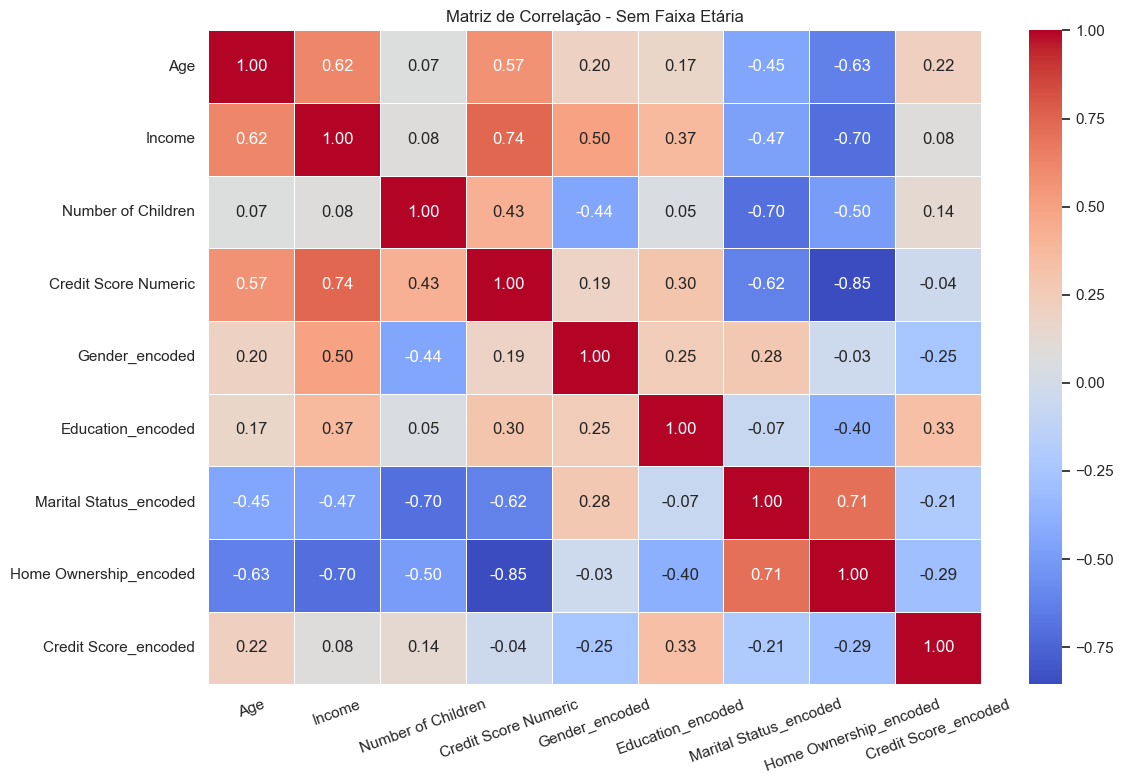

In [98]:
# Calcula a matriz de correlação
correlation_matrix = df_encoded.corr()

# Configurações do gráfico
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlação - Sem Faixa Etária")
plt.xticks(rotation=20)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Home Ownership_encoded x Credit Score Numeric = -0,85

Alta correlação negativa (valor muito alto em módulo).

Isto indica que quem tem casa própria (dependendo do encoding: 0 ou 1) tende a ter significativamente um perfil de score diferente de quem aluga. É coerente: clientes com casa própria geralmente têm maior estabilidade financeira, mas dependendo do encoding (por exemplo, “Owned=0”, “Rented=1”), o sinal pode ser invertido.


Marital Status_encoded x Home Ownership_encoded = 0,70

Correlação alta positiva.

Faz sentido porque pessoas casadas (dependendo do encoding) tendem mais a ter casa própria do que solteiras, refletindo um padrão social.


Number of Children x Marital Status_encoded = -0,69

Correlação relativamente alta e negativa.

Natural, pois pessoas solteiras (dependendo do encoding) tendem a ter menos filhos, enquanto pessoas casadas têm maior probabilidade de ter filhos.


Credit Score Numeric x Marital Status_encoded = -0,62

Correlação moderada/alta negativa.

Pessoas solteiras podem ter um comportamento de consumo diferente de casados, refletindo no score, novamente dependendo de como foi codificado.

**F) Faça a separação da base em treino e teste e verifique utilizando shape:**

In [99]:
#seu código aqui
from sklearn.model_selection import train_test_split

# Separar features (X) e target (y)
X = df.drop('Credit Score', axis=1)  
y = df['Credit Score']               

# Separação treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificação dos shapes
print("Shape de X_train:", X_train.shape)
print("Shape de X_test :", X_test.shape)
print("Shape de y_train:", y_train.shape)
print("Shape de y_test :", y_test.shape)

Shape de X_train: (131, 14)
Shape de X_test : (33, 14)
Shape de y_train: (131,)
Shape de y_test : (33,)


**G) É hora de verificar se nossa coluna de Score de crédito está balanceada, verifique através de um gráfico e traga sua opinião acerca do balanceamento.**

C:\Users\lucas\AppData\Local\Temp\ipykernel_18388\877216881.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Credit Score', palette='Set2')


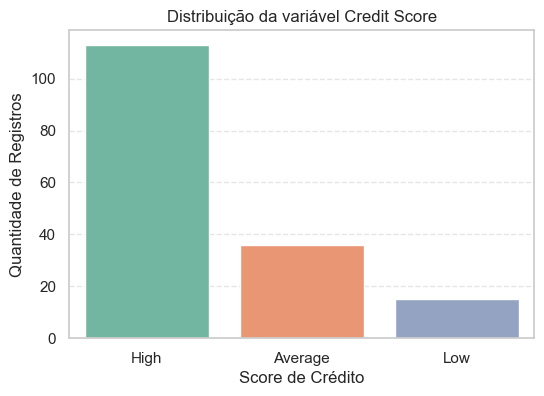


Distribuição da coluna Credit Score:
Credit Score
High       113
Average     36
Low         15
Name: count, dtype: int64


In [102]:
# Gráfico de contagem para Score de crédito
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Credit Score', palette='Set2')

plt.title('Distribuição da variável Credit Score')
plt.xlabel('Score de Crédito')
plt.ylabel('Quantidade de Registros')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

# Tabela com as contagens
tabela_score = df['Credit Score'].value_counts()  # Changed 'Score_de_credito' to 'Credit Score'
print("\nDistribuição da coluna Credit Score:")
print(tabela_score)

A base de dados não está balanceada.

A classe "High" representa aproximadamente 66% dos dados.

A classe "Average" representa 21%.

A classe "Low" representa apenas 9%.


Esse desbalanceamento pode causar problemas em modelos preditivos, pois o algoritmo tende a favorecer a classe majoritária ("High"), ignorando ou errando mais nas classes minoritárias, especialmente a "Low", que é justamente uma das mais críticas em contextos de análise de crédito.

**H) Vamos realizar o balancecamento dos dados da coluna de credit score.**
Se lembre que realizazmos apenas para a base de treino.

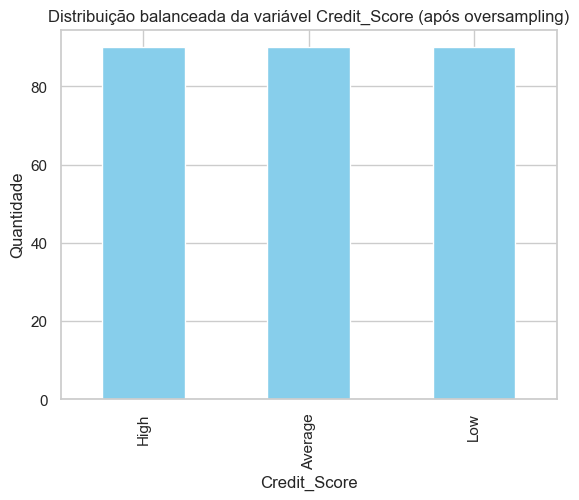

Distribuição pós-balanceamento:
Credit Score
High       90
Average    90
Low        90
Name: count, dtype: int64


In [103]:
from imblearn.over_sampling import RandomOverSampler

# Separando variáveis independentes (X) e dependentes (y)
X_treino = X_train
y_treino = y_train

# Instanciando o RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Aplicando o oversampling apenas nos dados de treino
X_treino_bal, y_treino_bal = ros.fit_resample(X_treino, y_treino)

# Verificando a nova distribuição das classes

y_treino_bal.value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribuição balanceada da variável Credit_Score (após oversampling)')
plt.xlabel('Credit_Score')
plt.ylabel('Quantidade')
plt.grid(True)
plt.show()

# Visualizando com print
print("Distribuição pós-balanceamento:")
print(pd.Series(y_treino_bal).value_counts())

Antes do balanceamento, o modelo de machine learning poderia sofrer viés, priorizando a classe mais frequente (High) e negligenciando as menos representadas (Low e Average). Isso resultaria em um desempenho ruim na predição de clientes com baixo ou médio score de crédito — justamente os perfis mais críticos para tomada de decisão.

Agora, com as classes equilibradas, o modelo:

terá melhor capacidade preditiva para todas as categorias;

proporcionará análises mais justas e representativas


ajudará a empresa a evitar riscos e oportunidades mal avaliadas, principalmente com clientes de score mais baixo que poderiam ser mal classificados.